In [166]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize
def normalize_normal_map(N):
    """
    N is a unnormalized normal map of shape H_W_3. Normalize N across the third dimension.
    :param N:
    :return:
    """
    H, W, C = N.shape
    N = np.reshape(N, (-1, C))
    N = normalize(N, axis=1)
    N = np.reshape(N, (H, W, C))
    return N


In [184]:
l = 1024
r = 500
mask = np.zeros((l, l))
for i in range(l):
    for j in range(l):
        x, y = j, l-i 
        if (x-l/2)**2+(y-l/2)**2<=r**2:
            mask[i][j] = 1

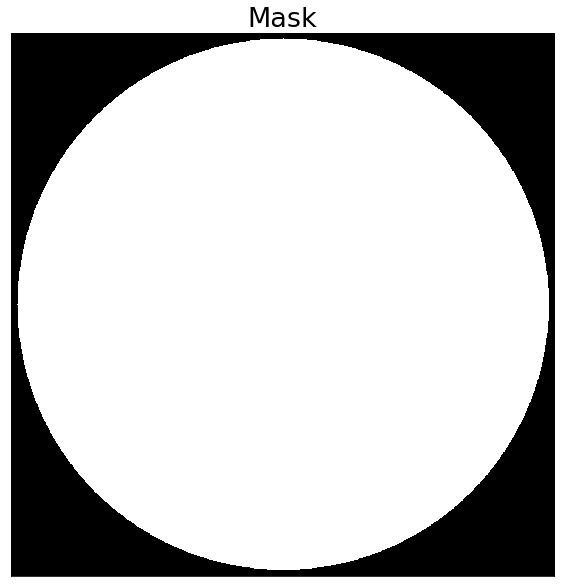

In [185]:
fontdict = {'fontsize': 27}
plt.figure(figsize=(10,10))
fig = plt.subplot(1,1,1)
fig.imshow(mask, "gray")
fig.set_title("Mask", fontdict)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

In [186]:
t = np.where(mask)
depth = mask.copy()

In [187]:
depth[t] =  (r**2-(t[1]-l/2)**2-(l-t[0]-l/2)**2)**0.5

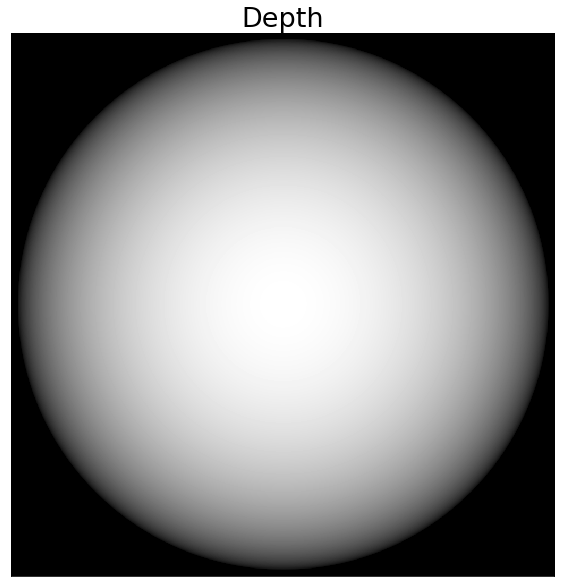

In [188]:
fontdict = {'fontsize': 27}
plt.figure(figsize=(10,10))
fig = plt.subplot(1,1,1)
fig.imshow(depth, "gray")
fig.set_title("Depth", fontdict)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

In [189]:
n = np.zeros((l, l, 3))
n[:,:,0][t] = t[1]-r
n[:,:,1][t] = l-t[0]-r
n[:,:,2][t] = depth[t]
n = normalize_normal_map(n)

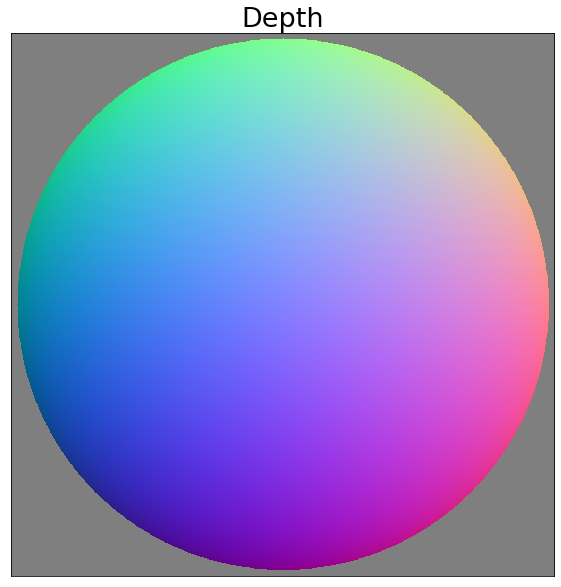

In [190]:
fontdict = {'fontsize': 27}
plt.figure(figsize=(10,10))
fig = plt.subplot(1,1,1)
fig.imshow((n+1)/2)
fig.set_title("Depth", fontdict)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)